___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [ ]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
female = pd.read_csv('soldier_female.csv', encoding='latin1')
male = pd.read_csv('soldier_male.csv', encoding='latin1')

In [5]:
female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [7]:
male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [9]:
female.shape, male.shape

((1986, 108), (4082, 108))

In [11]:
female.rename(columns={'SubjectId':'subjectid'}, inplace=True)

In [13]:
soldier = pd.concat([female, male], axis=0)
soldier.shape

(6068, 108)

In [16]:
for feature in soldier.dtypes[soldier.dtypes == 'object'].index:
    print(soldier[feature].value_counts())
    print('---' * 15)

Gender
Male      4082
Female    1986
Name: count, dtype: int64
---------------------------------------------
Date
27-Feb-12    45
5-Apr-12     44
21-Feb-12    43
28-Feb-12    43
5-Mar-12     43
2-Jun-11     41
6-Mar-12     41
26-May-11    40
26-Mar-12    40
3-Apr-12     40
27-Apr-11    39
13-Mar-12    39
29-Feb-12    39
30-Mar-11    39
23-Feb-12    39
15-Mar-11    39
8-Dec-10     38
1-Mar-12     38
20-Mar-12    37
28-May-11    37
7-Mar-12     36
21-Mar-11    36
24-Jan-12    36
11-Apr-11    36
2-Mar-12     36
21-Mar-12    36
25-Jan-12    35
18-Mar-11    35
24-Feb-12    34
16-Mar-12    34
15-Aug-11    33
8-Jun-11     33
30-Jan-11    33
27-May-11    33
25-Mar-12    33
28-Jan-12    33
25-Mar-11    33
8-Mar-12     32
19-Mar-12    32
7-Jun-11     32
26-Mar-11    32
16-Aug-11    32
20-Jan-11    31
17-Mar-11    31
31-Mar-11    31
7-Nov-11     31
8-Dec-11     31
19-Jan-12    31
12-Dec-11    31
27-Jan-12    31
7-Dec-11     30
24-Mar-12    30
2-Feb-12     30
31-Jan-12    30
23-Nov-10    30
5-Oct-

In [15]:
soldier.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand


In [17]:
DODRace = soldier.DODRace

In [19]:
df = soldier.iloc[:,1:-13]

In [21]:
df['DODRace'] = DODRace

In [23]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,DODRace
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,2
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,3
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,1
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,2
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,1


In [25]:
df.shape

(6068, 95)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0
bicristalbreadth,6068.0,274.735003,19.221034,197.0,262.00,274.0,288.00,362.0


In [27]:
df.DODRace.value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

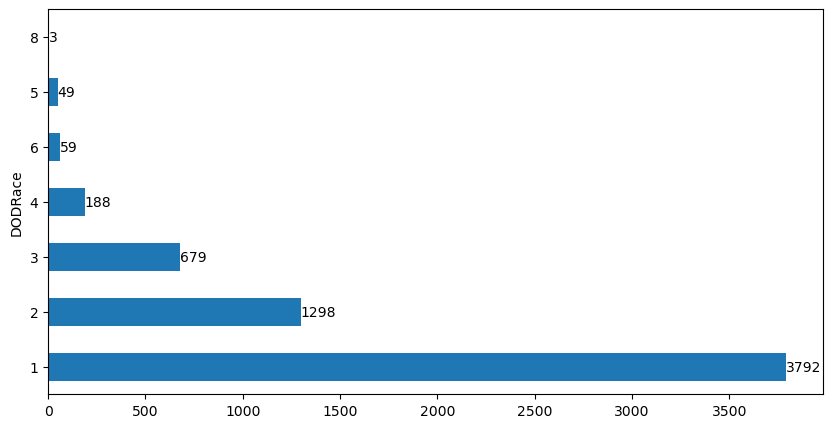

In [29]:
ax = df.DODRace.value_counts().plot(kind='barh', figsize=(10,5))
ax.bar_label(ax.containers[0]);

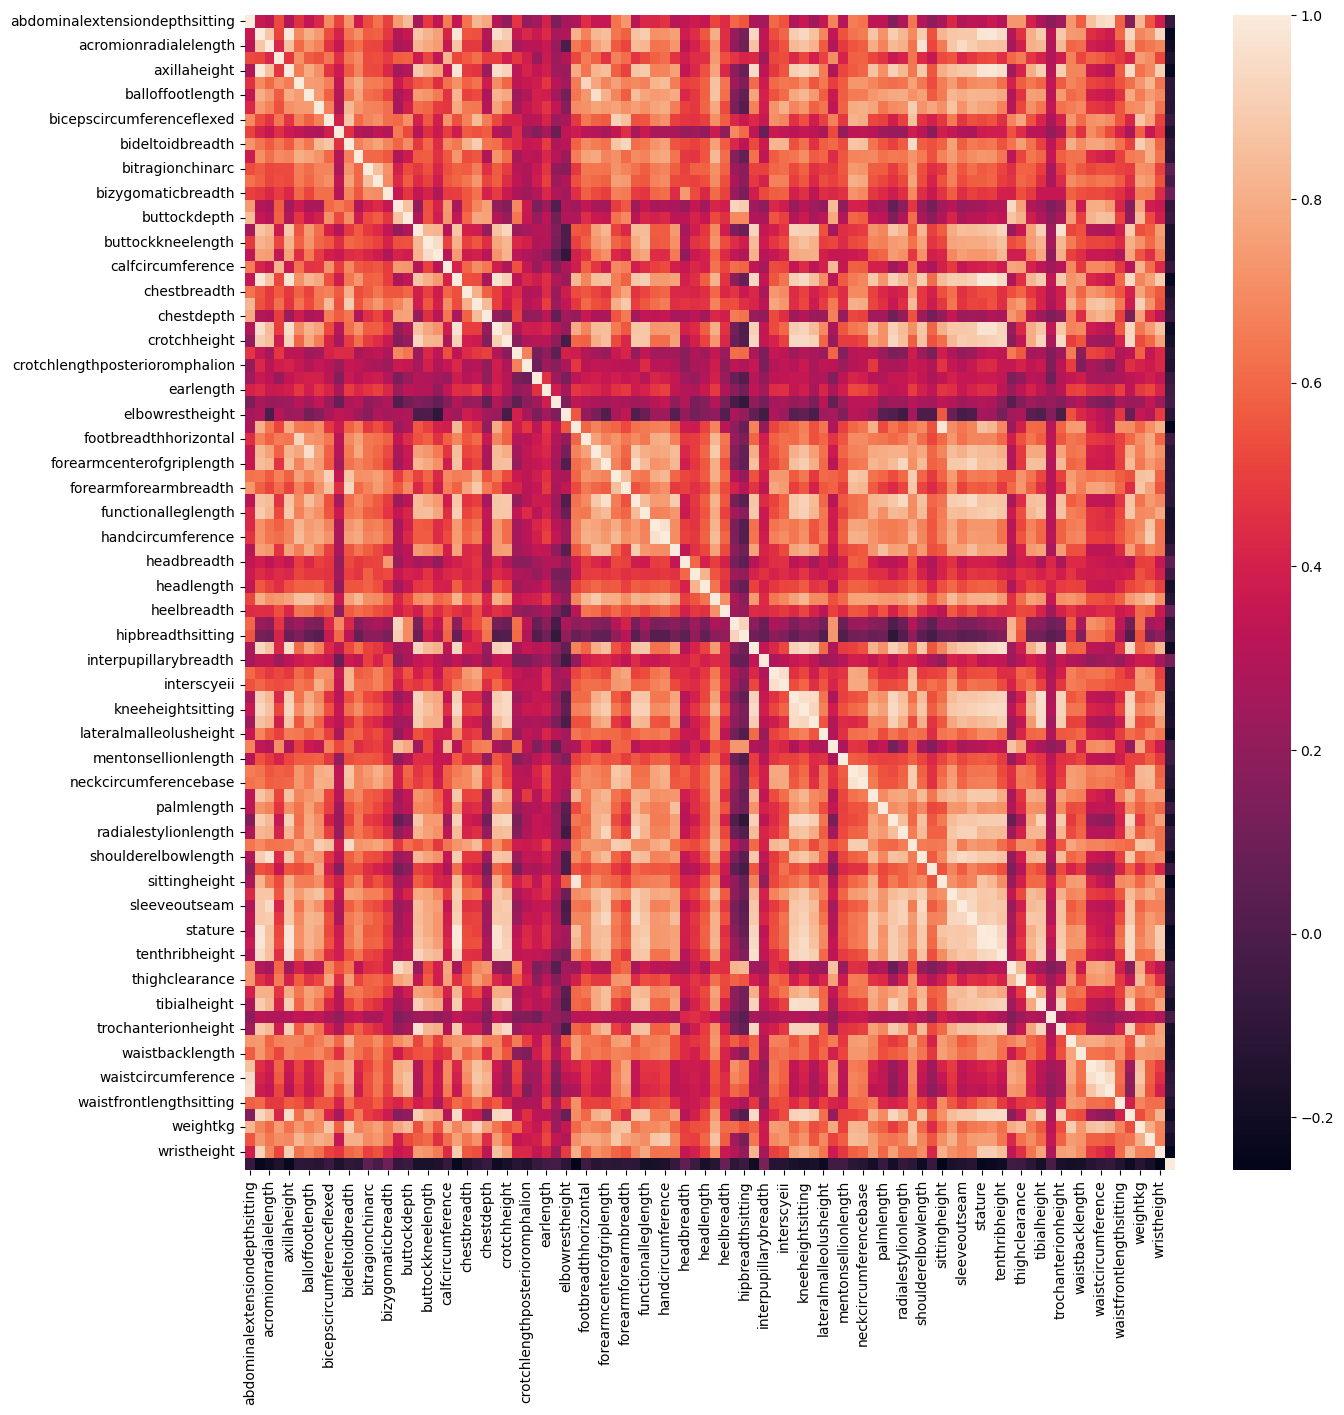

In [44]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True));

## Explore Data

In [31]:
df.weightkg.describe()

count    6068.000000
mean      797.093935
std       156.528164
min       358.000000
25%       682.000000
50%       785.000000
75%       896.000000
max      1442.000000
Name: weightkg, dtype: float64

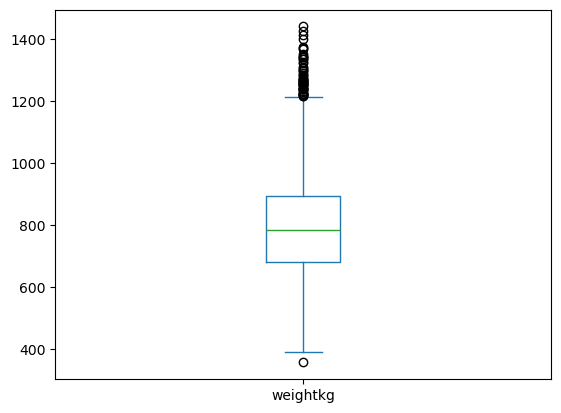

In [33]:
df.weightkg.plot(kind='box');

In [35]:
q1 = df.weightkg.describe()['25%']
q3 = df.weightkg.describe()['75%']
iqr = q3 - q1
lowlim = q1 - (1.5 * iqr)
uplim = q3 + (1.5 * iqr)

df[(df.weightkg < lowlim) | (df.weightkg > uplim)].index

Index([1615,   37,   55,  118,  352,  373,  381,  663,  682,  785,  972,  976,
        993, 1049, 1061, 1113, 1194, 1327, 1444, 1570, 1609, 1673, 1694, 1722,
       1735, 1789, 1798, 1903, 1922, 1924, 2044, 2082, 2098, 2102, 2138, 2172,
       2177, 2250, 2309, 2333, 2388, 2888, 2974, 3142, 3206, 3230, 3359, 3405,
       3442, 3567, 3609, 3620, 3636, 3697, 3718, 4027],
      dtype='int64')

In [37]:
df.drop(df[(df.weightkg < lowlim) | (df.weightkg > uplim)].index, axis=0, inplace=True)

In [39]:
df.stature.describe()

count    5982.000000
mean     1713.657138
std        89.225601
min      1409.000000
25%      1652.000000
50%      1719.000000
75%      1777.750000
max      1993.000000
Name: stature, dtype: float64

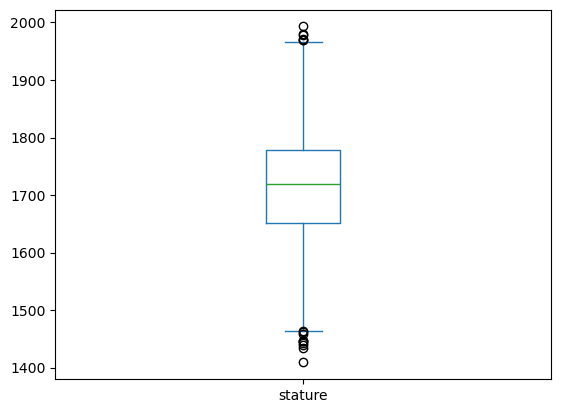

In [41]:
df.stature.plot(kind='box');

In [43]:
q1 = df.stature.describe()['25%']
q3 = df.stature.describe()['75%']
iqr = q3 - q1
lowlim = q1 - (1.5 * iqr)
uplim = q3 + (1.5 * iqr)

df[(df.stature < lowlim) | (df.stature > uplim)].index

Index([  26,  295,  676,  766,  818,  867,  878, 1331, 1515, 1882,  306, 2246,
       2421, 3061, 3172, 3386],
      dtype='int64')

In [45]:
df.drop(df[(df.stature < lowlim) | (df.stature > uplim)].index, axis=0, inplace=True)

In [47]:
df.shape

(5955, 95)

In [49]:
df0 = df.copy()

In [58]:
df.drop(df[df.DODRace.isin([5, 6, 8])].index, axis=0, inplace=True)

DODRace
1    3678
2    1256
3     659
4     180
Name: count, dtype: int64

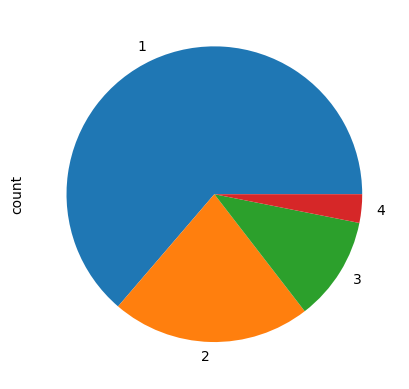

In [60]:
display(df.DODRace.value_counts())
df.DODRace.value_counts().plot(kind='pie');

In [62]:
def color_red(val):
    
    if (val >= 0.90 and val < 1) or (val <= -0.90 and val > -1):
        color = 'red'
    else:
        color = 'green'
    return f'color: {color}'

df.corr(numeric_only=True).style.map(color_red)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance


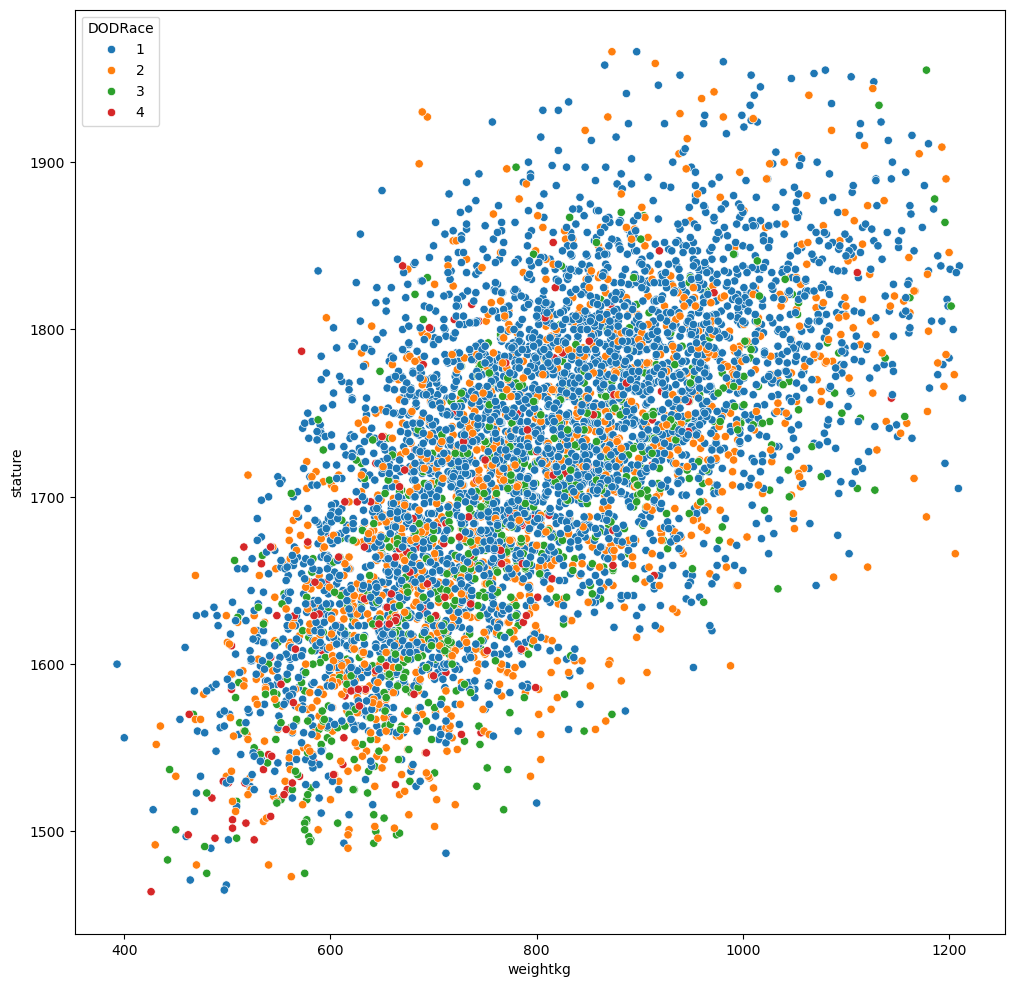

In [64]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df, x='weightkg', y='stature', hue='DODRace', palette='tab10');

In [66]:
df.Gender.value_counts()

Gender
Male      3900
Female    1873
Name: count, dtype: int64

In [68]:
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [70]:
df.sample(1)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace,Gender_Male
329,239,1617,369,237,1500,246,203,387,309,302,445,79,313,288,136,1020,238,988,686,564,393,1681,260,962,242,1470,977,670,403,39,64,24,269,866,99,280,379,278,504,510,1304,82,200,197,158,602,209,355,69,357,383,1203,630,412,441,551,619,560,80,412,134,373,435,1543,116,484,297,1097,394,160,992,943,651,1932,1958,1595,1260,626,186,891,546,139,1010,1777,489,329,908,222,414,1195,866,173,956,1,1


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [72]:
X = df.drop('DODRace', axis=1)
y = df.DODRace

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [80]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=1000))]

vanilla_logistic_pipe = Pipeline(steps=operations)

vanilla_logistic_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [96]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [86]:
eval_metric(vanilla_logistic_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[700   9  22   5]
 [ 17 224  10   0]
 [ 65  17  48   2]
 [ 11   1   6  18]]
              precision    recall  f1-score   support

           1       0.88      0.95      0.92       736
           2       0.89      0.89      0.89       251
           3       0.56      0.36      0.44       132
           4       0.72      0.50      0.59        36

    accuracy                           0.86      1155
   macro avg       0.76      0.68      0.71      1155
weighted avg       0.84      0.86      0.85      1155


Train_Set
[[2834   31   69    8]
 [  58  931   15    1]
 [ 266   47  198   16]
 [  39    3   22   80]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92      2942
           2       0.92      0.93      0.92      1005
           3       0.65      0.38      0.48       527
           4       0.76      0.56      0.64       144

    accuracy                           0.88      4618
   macro avg       0.80      0.71      0.74      

### Logistic Model GridsearchCV

In [88]:
from sklearn.model_selection import GridSearchCV

In [142]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=2500, solver='saga'))]
 
grid_logistic = Pipeline(steps=operations)

In [144]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 10]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}

In [146]:
logistic_grid_final = GridSearchCV(grid_logistic, param_grid = param_grid, cv=5, return_train_score=True)

In [148]:
logistic_grid_final.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=2500,
                                                           solver='saga'))]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True)

In [150]:
logistic_grid_final.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, max_iter=2500, solver='saga'))])

In [152]:
pd.DataFrame(logistic_grid_final.cv_results_).loc[logistic_grid_final.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.854483
mean_train_score     0.87121
Name: 3, dtype: object

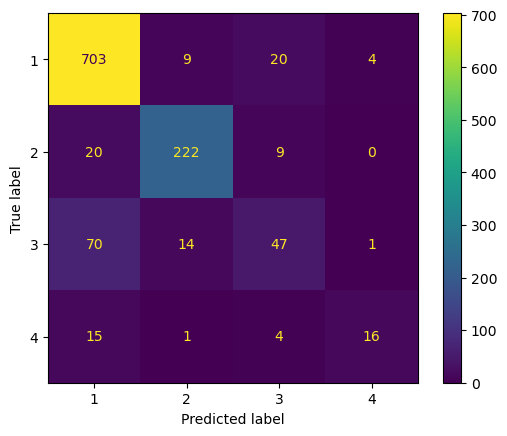

In [154]:
ConfusionMatrixDisplay.from_estimator(logistic_grid_final, X_test, y_test);

In [156]:
eval_metric(logistic_grid_final, X_train, y_train, X_test, y_test)

Test_Set
[[703   9  20   4]
 [ 20 222   9   0]
 [ 70  14  47   1]
 [ 15   1   4  16]]
              precision    recall  f1-score   support

           1       0.87      0.96      0.91       736
           2       0.90      0.88      0.89       251
           3       0.59      0.36      0.44       132
           4       0.76      0.44      0.56        36

    accuracy                           0.86      1155
   macro avg       0.78      0.66      0.70      1155
weighted avg       0.84      0.86      0.84      1155


Train_Set
[[2843   32   57   10]
 [  70  921   13    1]
 [ 271   51  193   12]
 [  46    3   30   65]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92      2942
           2       0.91      0.92      0.92      1005
           3       0.66      0.37      0.47       527
           4       0.74      0.45      0.56       144

    accuracy                           0.87      4618
   macro avg       0.80      0.68      0.72      

## 2. SVC

### Vanilla SVC model

In [158]:
from sklearn.svm import SVC

operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
vanilla_svc = Pipeline(steps=operations)
vanilla_svc.fit(X_train, y_train)
eval_metric(vanilla_svc, X_train, y_train, X_test, y_test)

Test_Set
[[719  13   4   0]
 [ 24 222   5   0]
 [ 94  12  25   1]
 [ 22   1   4   9]]
              precision    recall  f1-score   support

           1       0.84      0.98      0.90       736
           2       0.90      0.88      0.89       251
           3       0.66      0.19      0.29       132
           4       0.90      0.25      0.39        36

    accuracy                           0.84      1155
   macro avg       0.82      0.58      0.62      1155
weighted avg       0.83      0.84      0.81      1155


Train_Set
[[2916   16    9    1]
 [  67  936    2    0]
 [ 344   45  136    2]
 [  79    3   18   44]]
              precision    recall  f1-score   support

           1       0.86      0.99      0.92      2942
           2       0.94      0.93      0.93      1005
           3       0.82      0.26      0.39       527
           4       0.94      0.31      0.46       144

    accuracy                           0.87      4618
   macro avg       0.89      0.62      0.68      

###  SVC Model GridsearchCV

In [144]:
param_grid = {
    'SVC__C': [0.01, 1, 100],                 
    'SVC__gamma': ['scale', 0.1],            
    'SVC__kernel': ['rbf', 'linear'],        
    'SVC__class_weight': ['balanced']      
}

In [154]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring='f1_weighted',
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1)

In [ ]:
svm_model_grid.fit(X_train, y_train)

In [ ]:
svm_model_grid.best_estimator_

In [ ]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

## 3. RF

### Vanilla RF Model

In [160]:
from sklearn.ensemble import RandomForestClassifier

operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(random_state=101))]
vanilla_RF = Pipeline(steps=operations)

vanilla_RF.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [162]:
eval_metric(vanilla_RF, X_train, y_train, X_test, y_test)

Test_Set
[[718  17   1   0]
 [ 62 185   4   0]
 [114  10   8   0]
 [ 29   0   3   4]]
              precision    recall  f1-score   support

           1       0.78      0.98      0.87       736
           2       0.87      0.74      0.80       251
           3       0.50      0.06      0.11       132
           4       1.00      0.11      0.20        36

    accuracy                           0.79      1155
   macro avg       0.79      0.47      0.49      1155
weighted avg       0.77      0.79      0.74      1155


Train_Set
[[2942    0    0    0]
 [   0 1005    0    0]
 [   0    0  527    0]
 [   0    0    0  144]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2942
           2       1.00      1.00      1.00      1005
           3       1.00      1.00      1.00       527
           4       1.00      1.00      1.00       144

    accuracy                           1.00      4618
   macro avg       1.00      1.00      1.00      

### RF Model GridsearchCV

In [164]:
param_grid = {'n_estimators':[100, 500], 'criterion':['entropy','gini'],
                 'max_features':['log2'], 'max_depth':[10]}

In [166]:
grid_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=101),
                    param_grid= param_grid, 
                    refit = True, 
                    verbose=2, 
                    cv=5 )

In [168]:
grid_RF.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   1.7s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   2.5s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   4.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   2.1s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=100; total time=   2.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=500; total time=   8.5s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=500; total time=   7.8s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=500; total time=  11.7s
[CV] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=500; total time=   8.4s
[CV] END criterion=entropy, max_depth=10, max_features=log

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [10],
                         'max_features': ['log2'], 'n_estimators': [100, 500]},
             verbose=2)

In [170]:
grid_RF.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=500, random_state=101)

In [172]:
eval_metric(grid_RF, X_train, y_train, X_test, y_test)

Test_Set
[[726  10   0   0]
 [ 78 172   1   0]
 [122   7   3   0]
 [ 32   0   0   4]]
              precision    recall  f1-score   support

           1       0.76      0.99      0.86       736
           2       0.91      0.69      0.78       251
           3       0.75      0.02      0.04       132
           4       1.00      0.11      0.20        36

    accuracy                           0.78      1155
   macro avg       0.85      0.45      0.47      1155
weighted avg       0.80      0.78      0.73      1155


Train_Set
[[2942    0    0    0]
 [  39  966    0    0]
 [ 291    0  236    0]
 [  61    0    0   83]]
              precision    recall  f1-score   support

           1       0.88      1.00      0.94      2942
           2       1.00      0.96      0.98      1005
           3       1.00      0.45      0.62       527
           4       1.00      0.58      0.73       144

    accuracy                           0.92      4618
   macro avg       0.97      0.75      0.82      

## 4. XGBoost

### Vanilla XGBoost Model

In [174]:
from xgboost import XGBClassifier

In [188]:
operations = [("scaler", StandardScaler()), ("boost", XGBClassifier(random_state=101))]
XGB_vanilla = Pipeline(steps=operations)

XGB_vanilla.fit(X_train, y_train-1)

Pipeline(steps=[('scaler', StandardScaler()),
                ('boost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [192]:
eval_metric(XGB_vanilla, X_train, y_train-1, X_test, y_test-1)

Test_Set
[[709  17   7   3]
 [ 38 204   9   0]
 [ 85  14  31   2]
 [ 17   1   6  12]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       736
           1       0.86      0.81      0.84       251
           2       0.58      0.23      0.34       132
           3       0.71      0.33      0.45        36

    accuracy                           0.83      1155
   macro avg       0.75      0.59      0.63      1155
weighted avg       0.81      0.83      0.80      1155


Train_Set
[[2942    0    0    0]
 [   0 1005    0    0]
 [   0    0  527    0]
 [   0    0    0  144]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2942
           1       1.00      1.00      1.00      1005
           2       1.00      1.00      1.00       527
           3       1.00      1.00      1.00       144

    accuracy                           1.00      4618
   macro avg       1.00      1.00      1.00      

### XGBoost Model GridsearchCV

In [206]:
param_grid = {"boost__n_estimators":[50, 100],
              'boost__max_depth':[4,5],
              "boost__learning_rate": [0.1],
              "boost__subsample":[0.7, 1],
              "boost__colsample_bytree":[0.7, 1]}

In [208]:
operations = [("scaler", StandardScaler()), ("boost", XGBClassifier(random_state=101))]
xgb_pipe = Pipeline(steps=operations)

In [210]:
xgb_grid = GridSearchCV(xgb_pipe,
                        param_grid,
                        scoring="f1_weighted",
                        verbose=2,
                        n_jobs=-1,
                        cv=5,
                        return_train_score=True)

xgb_grid.fit(X_train, y_train-1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('boost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'boost__colsample_bytree': [0.7, 1],
                         'boost__learning_rate': [0.1],
                         'boost__max_depth': [4, 5],
                         'boost__n_estimators': [50, 100],
                         'boost__subsample': [0.7, 1]},
             return_train_score=True, scoring='f1_weighted', verbose=2)

In [212]:
eval_metric(xgb_grid, X_train, y_train-1, X_test, y_test-1)

Test_Set
[[714  13   5   4]
 [ 40 204   7   0]
 [ 89  12  30   1]
 [ 19   1   6  10]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       736
           1       0.89      0.81      0.85       251
           2       0.62      0.23      0.33       132
           3       0.67      0.28      0.39        36

    accuracy                           0.83      1155
   macro avg       0.75      0.57      0.62      1155
weighted avg       0.81      0.83      0.80      1155


Train_Set
[[2939    2    1    0]
 [  13  992    0    0]
 [  81    7  439    0]
 [   6    0    0  138]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2942
           1       0.99      0.99      0.99      1005
           2       1.00      0.83      0.91       527
           3       1.00      0.96      0.98       144

    accuracy                           0.98      4618
   macro avg       0.99      0.94      0.96      

---
---

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [55]:
!pip install imblearn

In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
df0.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,DODRace
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,2
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,3
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,1
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,2
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,Female,1


In [53]:
df0.DODRace.value_counts()

DODRace
1    3725
2    1270
3     666
4     184
6      58
5      49
8       3
Name: count, dtype: int64

In [65]:
df_new = df0[df0.DODRace.isin([1,2,3,4])]

In [82]:
df_new = pd.get_dummies(df_new, drop_first=True, dtype=int)

In [84]:
X = df_new.drop('DODRace', axis=1)
y = df_new.DODRace

In [86]:
X.shape, y.shape

((5845, 94), (5845,))

In [104]:
X_res, y_res = SMOTE(random_state=101).fit_resample(X, y)

In [110]:
X_res.shape, y_res.shape

((14900, 94), (14900,))

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [114]:
from xgboost import XGBClassifier

operations = [("scaler", StandardScaler()), ("boost", XGBClassifier(random_state=101))]
pipeline = Pipeline(steps=operations)

In [118]:
pipeline.fit(X_train, y_train-1)

Pipeline(steps=[('scaler', StandardScaler()),
                ('boost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [120]:
eval_metric(pipeline, X_train, y_train-1, X_test, y_test-1)

Test_Set
[[686  19  45   6]
 [ 19 718   9   2]
 [ 28   4 743   1]
 [  0   0   1 699]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       756
           1       0.97      0.96      0.96       748
           2       0.93      0.96      0.94       776
           3       0.99      1.00      0.99       700

    accuracy                           0.96      2980
   macro avg       0.96      0.96      0.96      2980
weighted avg       0.96      0.96      0.95      2980


Train_Set
[[2969    0    0    0]
 [   0 2977    0    0]
 [   0    0 2949    0]
 [   0    0    0 3025]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00      2977
           2       1.00      1.00      1.00      2949
           3       1.00      1.00      1.00      3025

    accuracy                           1.00     11920
   macro avg       1.00      1.00      1.00     1

## Logistic Regression Over/ Under Sampling

In [124]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [126]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [130]:
from sklearn.linear_model import LogisticRegression

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=1000))]

pipe_log = Pipeline(steps=operations)

pipe_log.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [132]:
eval_metric(pipe_log, X_train, y_train, X_test, y_test)

Test_Set
[[27  2  8  1]
 [ 1 34  2  4]
 [ 8  1 22  3]
 [ 7  1  7 20]]
              precision    recall  f1-score   support

           1       0.63      0.71      0.67        38
           2       0.89      0.83      0.86        41
           3       0.56      0.65      0.60        34
           4       0.71      0.57      0.63        35

    accuracy                           0.70       148
   macro avg       0.70      0.69      0.69       148
weighted avg       0.71      0.70      0.70       148


Train_Set
[[119   1  24   2]
 [  1 137   5   0]
 [ 20   5 112  13]
 [  7   0  12 130]]
              precision    recall  f1-score   support

           1       0.81      0.82      0.81       146
           2       0.96      0.96      0.96       143
           3       0.73      0.75      0.74       150
           4       0.90      0.87      0.88       149

    accuracy                           0.85       588
   macro avg       0.85      0.85      0.85       588
weighted avg       0.85    

In [134]:
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X,y)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [138]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=1000))]

pipe_log_ovr = Pipeline(steps=operations)

pipe_log_ovr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=1000))])

In [140]:
eval_metric(pipe_log_ovr, X_train, y_train, X_test, y_test)

Test_Set
[[575  18 120  43]
 [ 15 677  42  14]
 [136  64 490  86]
 [ 42   7  97 554]]
              precision    recall  f1-score   support

           1       0.75      0.76      0.75       756
           2       0.88      0.91      0.89       748
           3       0.65      0.63      0.64       776
           4       0.79      0.79      0.79       700

    accuracy                           0.77      2980
   macro avg       0.77      0.77      0.77      2980
weighted avg       0.77      0.77      0.77      2980


Train_Set
[[2283   52  451  183]
 [  60 2693  169   55]
 [ 482  243 1857  367]
 [ 185   13  339 2488]]
              precision    recall  f1-score   support

           1       0.76      0.77      0.76      2969
           2       0.90      0.90      0.90      2977
           3       0.66      0.63      0.64      2949
           4       0.80      0.82      0.81      3025

    accuracy                           0.78     11920
   macro avg       0.78      0.78      0.78     1

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [150]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 6.8 MB/s eta 0:00:00a 0:00:01


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [154]:
from sklearn.ensemble import RandomForestClassifier

operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=500, random_state=101))]
rf_model = Pipeline(steps=operations)

rf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        max_features='log2', n_estimators=500,
                                        random_state=101))])

In [156]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[564  41 118  33]
 [ 19 711  18   0]
 [ 70  18 656  32]
 [  8   0   0 692]]
              precision    recall  f1-score   support

           1       0.85      0.75      0.80       756
           2       0.92      0.95      0.94       748
           3       0.83      0.85      0.84       776
           4       0.91      0.99      0.95       700

    accuracy                           0.88      2980
   macro avg       0.88      0.88      0.88      2980
weighted avg       0.88      0.88      0.88      2980


Train_Set
[[2857    7   63   42]
 [  14 2947   14    2]
 [  55    9 2845   40]
 [   1    0    0 3024]]
              precision    recall  f1-score   support

           1       0.98      0.96      0.97      2969
           2       0.99      0.99      0.99      2977
           3       0.97      0.96      0.97      2949
           4       0.97      1.00      0.99      3025

    accuracy                           0.98     11920
   macro avg       0.98      0.98      0.98     1

In [164]:
import shap
shap.initjs()

In [216]:
explainer = shap.TreeExplainer(rf_model['RF_model'])
X_test_scaled = rf_model['scaler'].transform(X_test)
explanation = explainer(X_test_scaled[5:6])
shap_values = explanation.values

In [244]:
rf_model['RF_model'].predict(X_test_scaled[5:6])

array([1])

In [218]:
shap_values.shape, X_test_scaled[5:6].shape

((1, 94, 4), (1, 94))

In [242]:
shap.plots.force(explainer.expected_value[0], shap_values[0])

In [272]:
X_test_scaled = rf_model['scaler'].transform(X_test)
explainer = shap.Explainer(rf_model['RF_model'])
shap_values = explainer(X_test_scaled[:100])

In [276]:
shap_values.shape

(100, 94, 4)

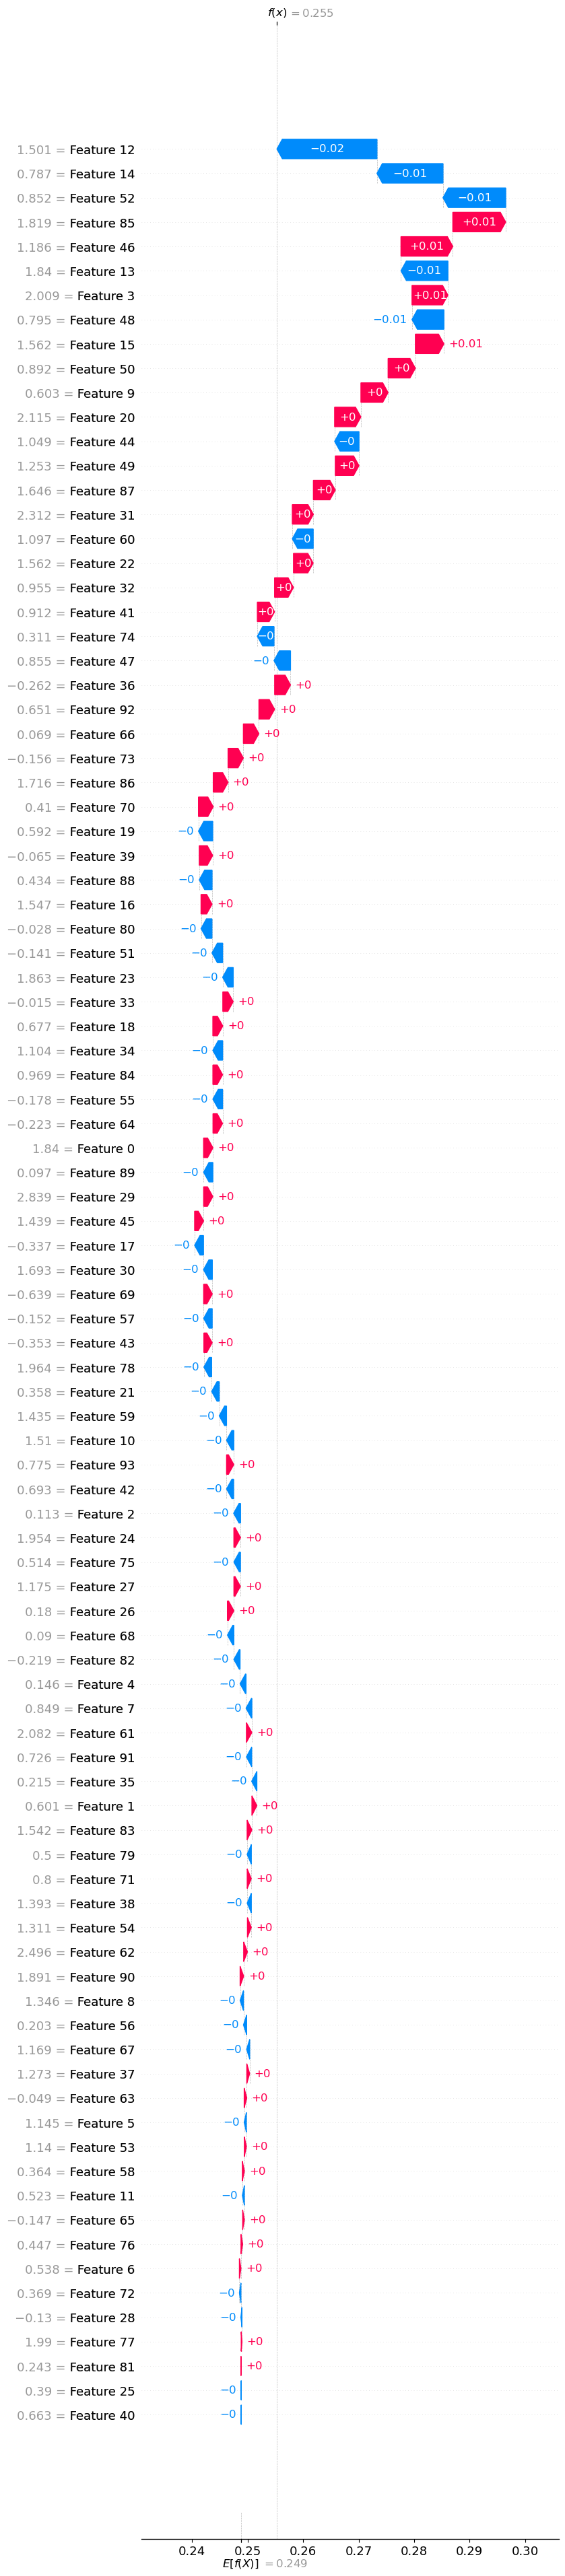

In [286]:
shap.plots.waterfall(shap_values[0, :, 0], max_display=100)

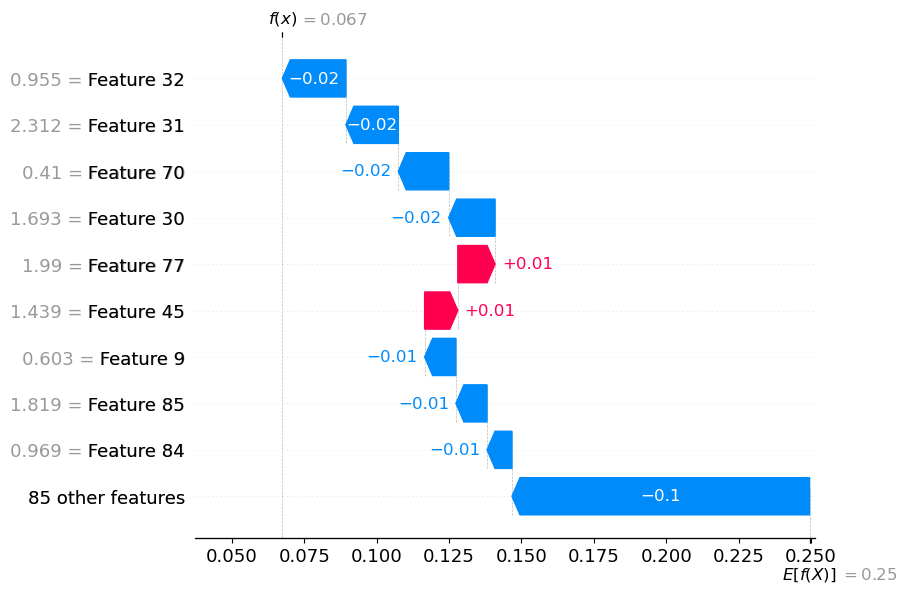

In [280]:
shap.plots.waterfall(shap_values[0, :, 1])

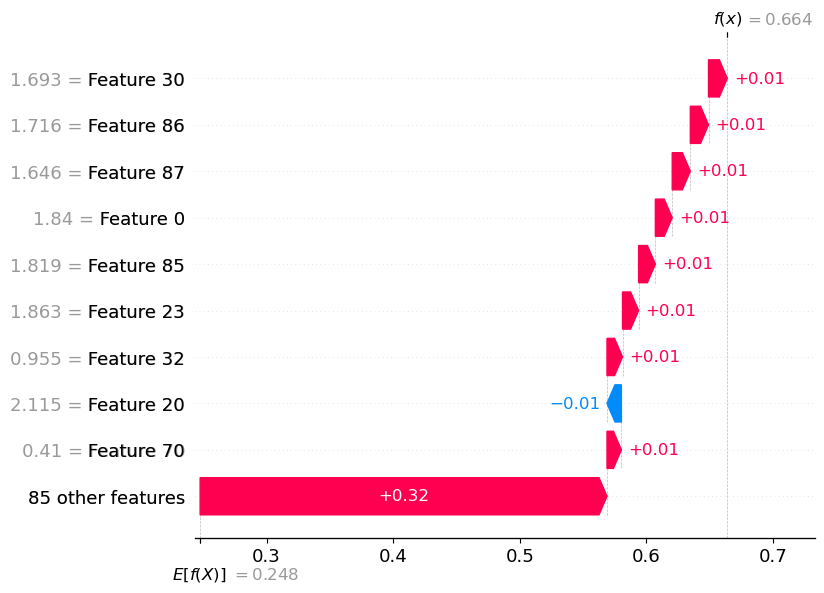

In [282]:
shap.plots.waterfall(shap_values[0, :, 2])

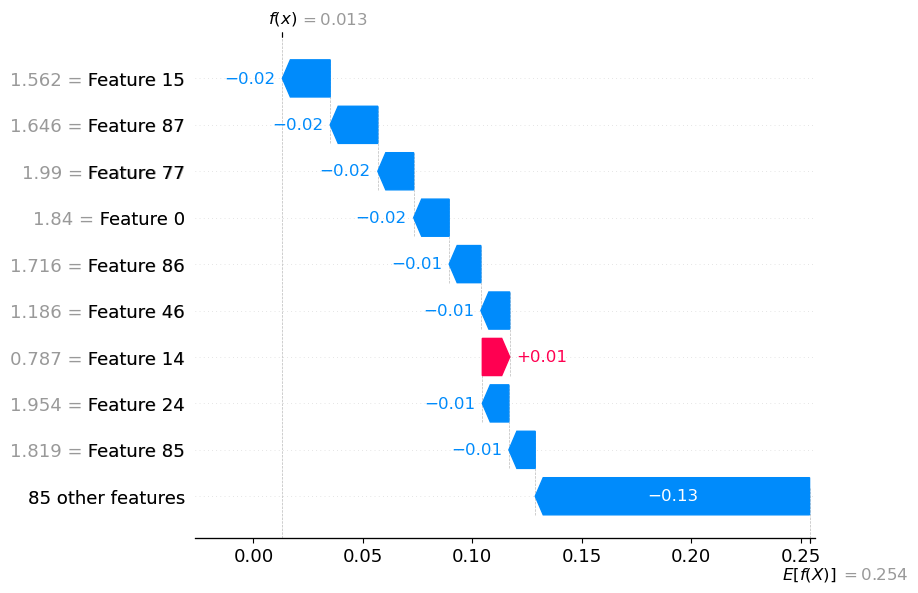

In [284]:
shap.plots.waterfall(shap_values[0, :, 3])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___